In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [2]:
# function to clean column names
def clear_cols(s):
    return s.strip().replace(" ","_")
# load data
path = '../Healthcare Provider Fraud Detection Analysis/Test_Beneficiarydata-1542969243754.csv'
df = pd.read_csv(path).rename(columns=clear_cols)

# display all columns
pd.set_option('display.max_columns', 50)

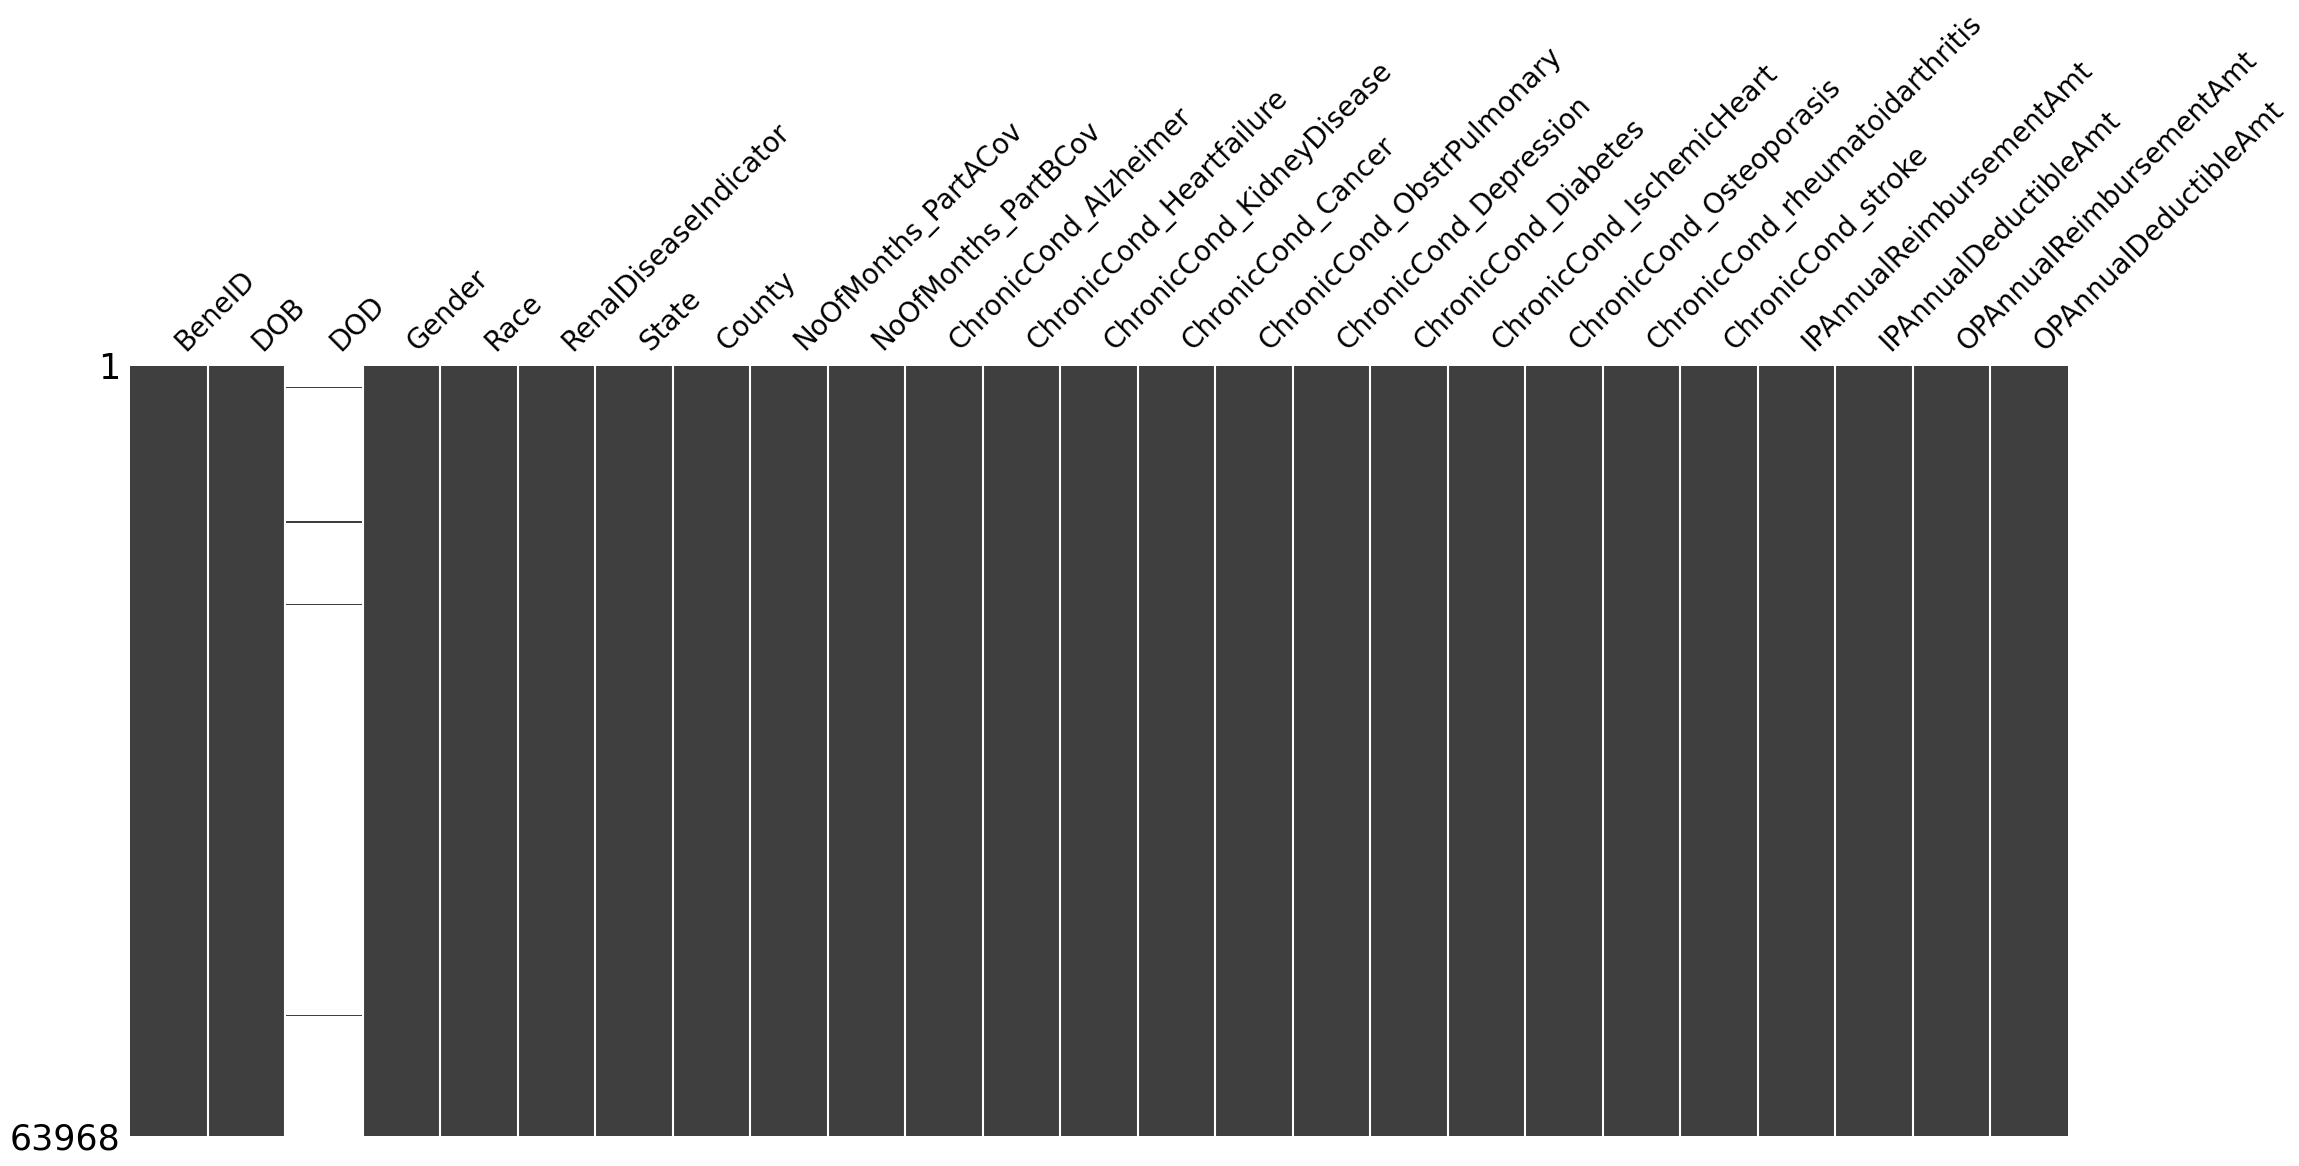

In [3]:
msno.matrix(df, sparkline=False, fontsize=20)
plt.show()

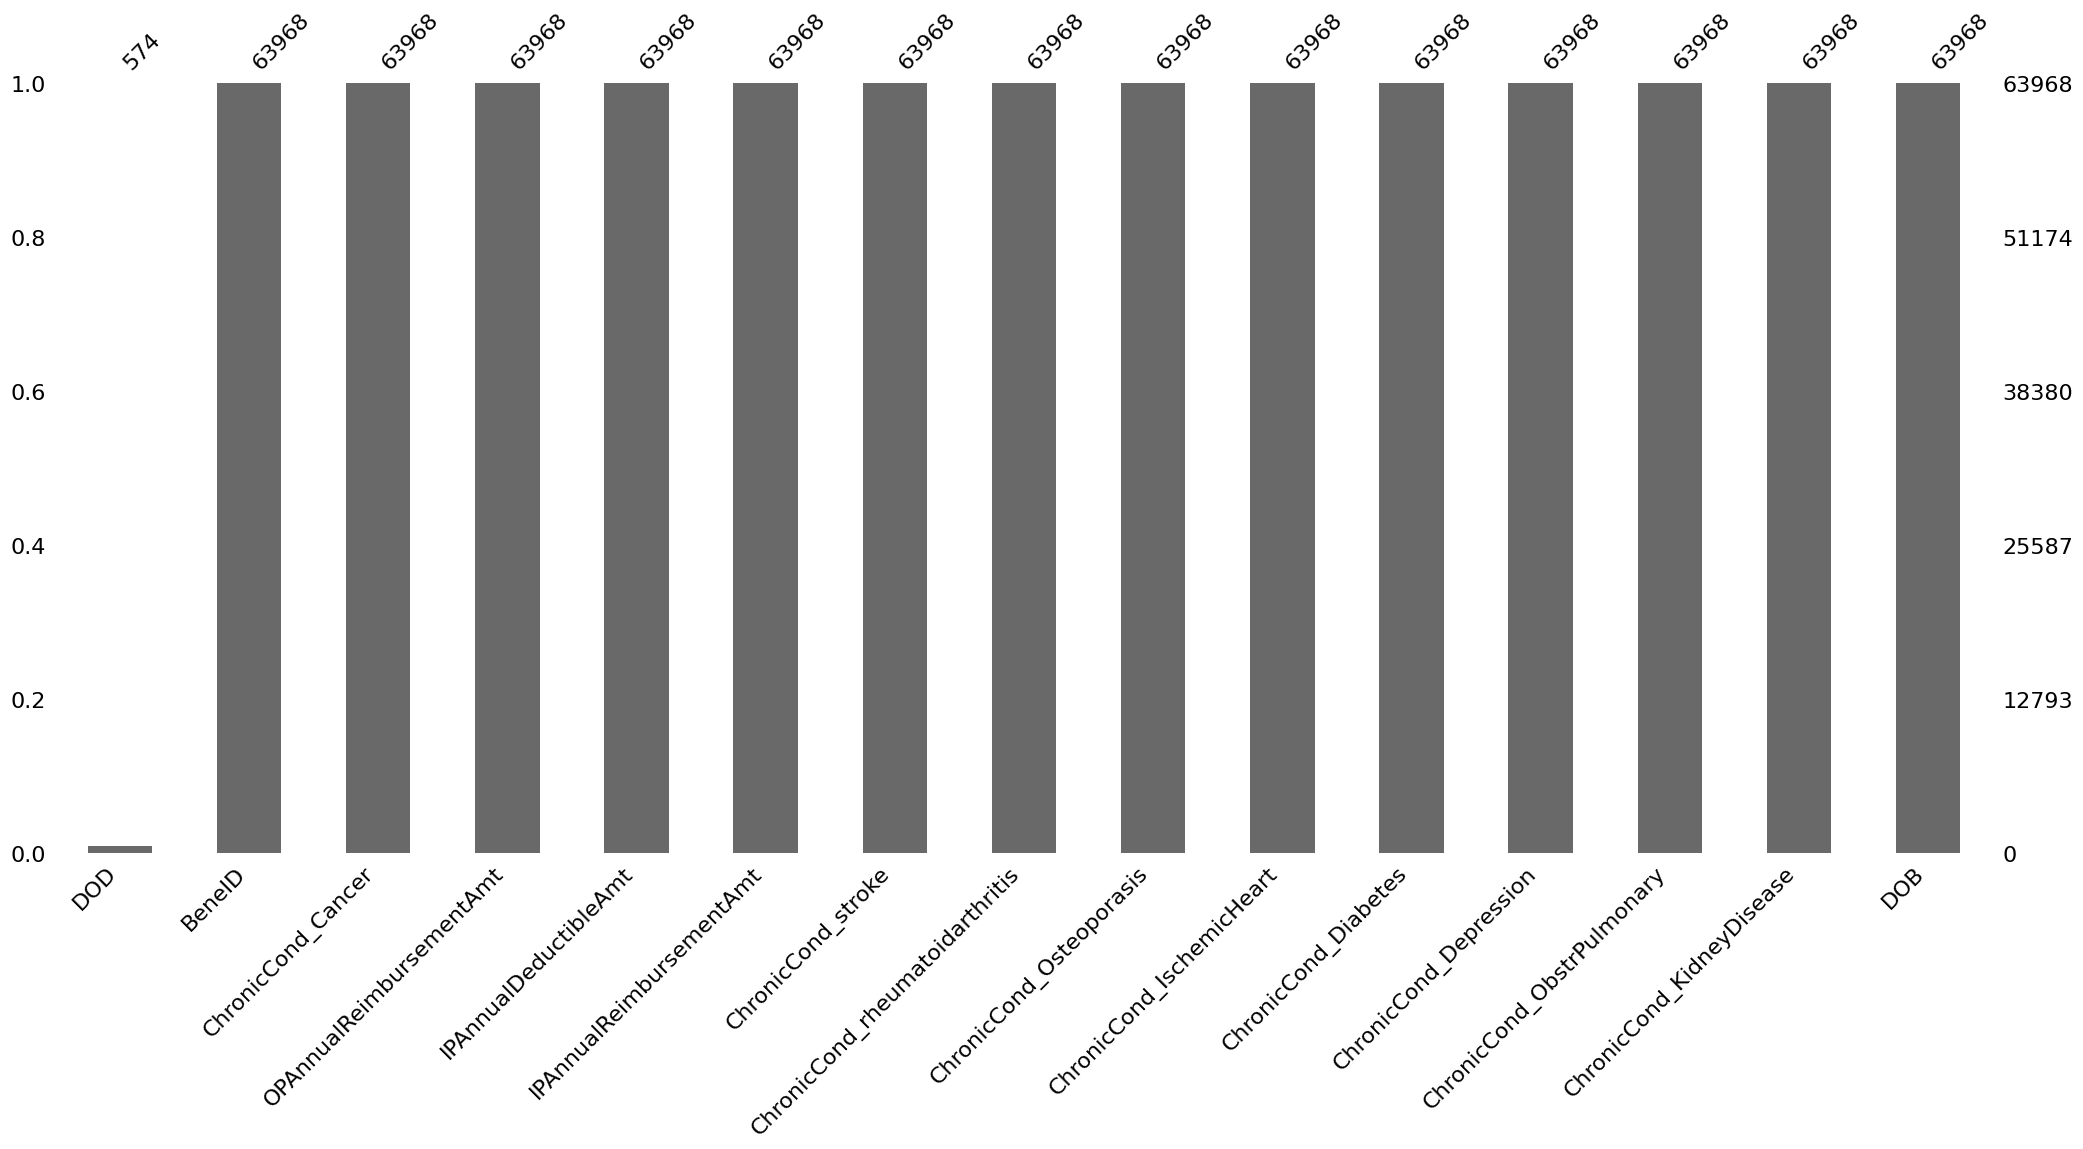

In [4]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Combining the counts and percentages into a DataFrame for better visualization
missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})

# Sort the DataFrame columns by the percentage of missing values
sorted_df = df[missing_info.sort_values(by='Percentage', ascending=False).index]

# Select the top 15 columns with the most missing values
top_15_missing = sorted_df.iloc[:, :15]

#Visual with missingno
msno.bar(top_15_missing)
plt.show()

In [5]:
print("shape: ", df.shape)
df.sample(5)

shape:  (63968, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
6569,BENE26124,1923-07-01,NaN,1,1,0,26,110,12,12,2,1,2,2,2,2,1,1,2,2,2,0,0,370,310
15562,BENE47042,1932-06-01,NaN,1,3,0,10,300,12,12,2,1,2,2,2,2,1,2,1,1,2,11000,1068,0,0
35408,BENE93000,1933-01-01,NaN,1,1,0,14,141,12,12,1,1,2,1,2,1,1,1,2,2,2,8000,1068,2460,430
63329,BENE157736,1935-07-01,NaN,2,1,Y,3,90,12,12,2,1,1,2,2,2,1,1,1,2,2,28350,1068,320,10
24262,BENE67134,1925-07-01,NaN,2,1,0,35,440,12,12,2,2,2,2,2,2,2,1,1,2,2,0,0,700,100


In [6]:
df.columns.to_list()

['BeneID',
 'DOB',
 'DOD',
 'Gender',
 'Race',
 'RenalDiseaseIndicator',
 'State',
 'County',
 'NoOfMonths_PartACov',
 'NoOfMonths_PartBCov',
 'ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'ChronicCond_stroke',
 'IPAnnualReimbursementAmt',
 'IPAnnualDeductibleAmt',
 'OPAnnualReimbursementAmt',
 'OPAnnualDeductibleAmt']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63968 entries, 0 to 63967
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   BeneID                           63968 non-null  object
 1   DOB                              63968 non-null  object
 2   DOD                              574 non-null    object
 3   Gender                           63968 non-null  int64 
 4   Race                             63968 non-null  int64 
 5   RenalDiseaseIndicator            63968 non-null  object
 6   State                            63968 non-null  int64 
 7   County                           63968 non-null  int64 
 8   NoOfMonths_PartACov              63968 non-null  int64 
 9   NoOfMonths_PartBCov              63968 non-null  int64 
 10  ChronicCond_Alzheimer            63968 non-null  int64 
 11  ChronicCond_Heartfailure         63968 non-null  int64 
 12  ChronicCond_KidneyDisease       

In [8]:
# presentage of missing values
df.isna().sum()/len(df) *100

BeneID                              0.000000
DOB                                 0.000000
DOD                                99.102676
Gender                              0.000000
Race                                0.000000
RenalDiseaseIndicator               0.000000
State                               0.000000
County                              0.000000
NoOfMonths_PartACov                 0.000000
NoOfMonths_PartBCov                 0.000000
ChronicCond_Alzheimer               0.000000
ChronicCond_Heartfailure            0.000000
ChronicCond_KidneyDisease           0.000000
ChronicCond_Cancer                  0.000000
ChronicCond_ObstrPulmonary          0.000000
ChronicCond_Depression              0.000000
ChronicCond_Diabetes                0.000000
ChronicCond_IschemicHeart           0.000000
ChronicCond_Osteoporasis            0.000000
ChronicCond_rheumatoidarthritis     0.000000
ChronicCond_stroke                  0.000000
IPAnnualReimbursementAmt            0.000000
IPAnnualDe

In [9]:
df['DOB'] = pd.to_datetime(df['DOB'])
df['DOD'] = pd.to_datetime(df['DOD'])

In [10]:
df.describe()

,DOB,DOD,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,63968,574,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000,63968.000000
mean,1936-04-02 23:37:52.286143104,2009-08-06 22:19:39.094076672,1.574053,1.250219,26.298681,368.597893,11.918850,11.928152,1.632566,1.457447,1.639101,1.862556,1.726097,1.607069,1.346767,1.282673,1.704055,1.717687,1.909533,4557.559561,497.287769,1664.710324,478.964154
min,1909-01-01 00:00:00,2009-01-01 00:00:00,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1000.000000,0.000000,-60.000000,0.000000
25%,1927-10-01 00:00:00,2009-06-01 00:00:00,1.000000,1.000000,12.000000,140.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,290.000000,70.000000
50%,1935-06-01 00:00:00,2009-08-16 12:00:00,2.000000,1.000000,26.000000,330.000000,12.000000,12.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,800.000000,230.000000
75%,1941-12-01 00:00:00,2009-11-01 00:00:00,2.000000,1.000000,39.000000,560.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5000.000000,1068.000000,1960.000000,590.000000
max,1983-12-01 00:00:00,2009-12-01 00:00:00,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,155600.000000,38272.000000,97510.000000,13840.000000
std,NaN,NaN,0.494490,0.710366,14.954124,270.243676,0.967169,0.841754,0.482110,0.498190,0.480265,0.344318,0.445963,0.488405,0.475945,0.450302,0.456470,0.450128,0.286852,10741.954472,1095.432994,3010.045357,768.234011


In [11]:
df.isnull().sum()


BeneID                                 0
DOB                                    0
DOD                                63394
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                     0
IPAnnualReimbursementAmt               0
IPAnnualDeductibleAmt                  0
OPAnnualReimbursementAmt               0
OPAnnualDeductib

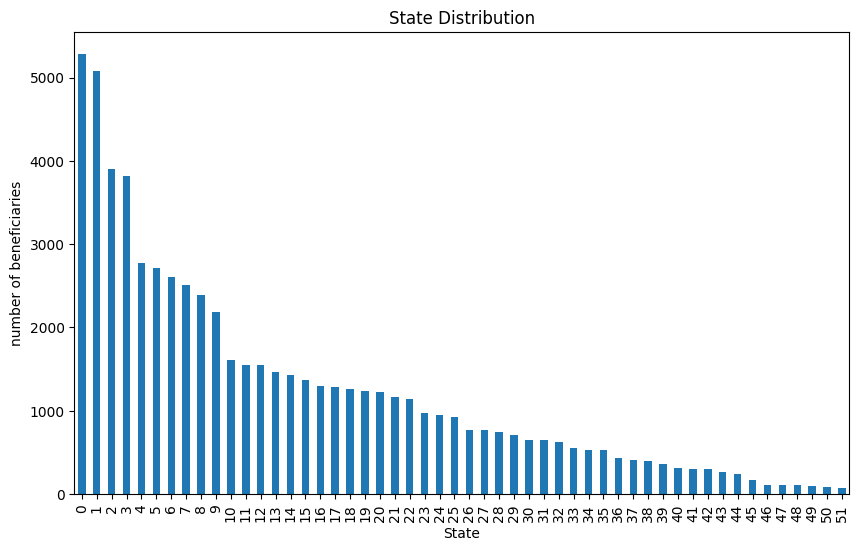

In [12]:
state = df['State'].value_counts().reset_index().sort_values(by='count', ascending=False)
state['count'].plot(kind='bar', figsize=(10, 6))
plt.title('State Distribution')
plt.xlabel('State')
plt.ylabel('number of beneficiaries')
plt.show()

In [13]:
df['BeneID'].value_counts().sort_values(ascending=False)

BeneID
BENE11001     1
BENE11035     1
BENE11072     1
BENE11071     1
BENE11010     1
             ..
BENE159183    1
BENE159184    1
BENE159187    1
BENE159193    1
BENE159197    1
Name: count, Length: 63968, dtype: int64

In [14]:
print(f"The number of unique beneficiaries -> {df['BeneID'].nunique()}")

The number of unique beneficiaries -> 63968


Gender
2    36721
1    27247
Name: count, dtype: int64


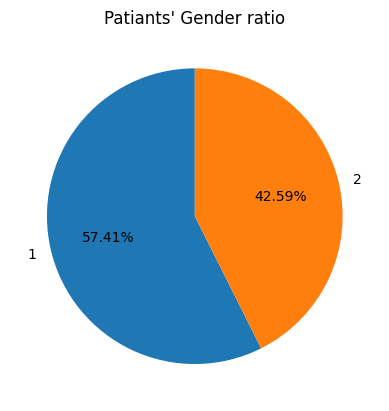

In [15]:
print(df['Gender'].value_counts())

plt.pie(df['Gender'].value_counts(), labels=['1','2'], autopct='%1.2f%%',startangle=90)
plt.title("Patiants' Gender ratio")
plt.show()

Race
1    54105
2     6384
3     2147
5     1332
Name: count, dtype: int64


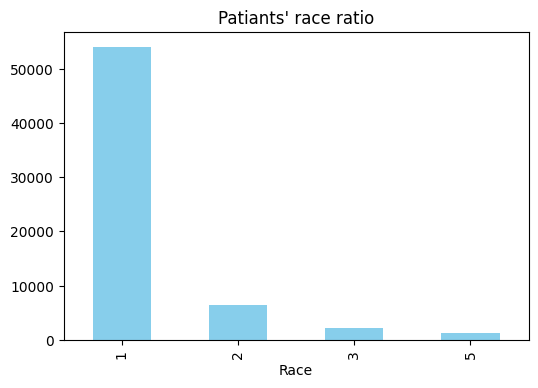

In [17]:
print(df['Race'].value_counts())

# df['race'].plot()
df['Race'].value_counts().plot(kind='bar', figsize=(6, 4),color='skyblue')
plt.title("Patiants' race ratio")
plt.show()

In [18]:
def plot_bar(data, columns, figsize=(7, 5)):
    """
    Plots bar plots for the specified columns in the dataframe.

    Parameters:
        data (pd.DataFrame): The dataframe containing the data.
        columns (list): List of column names to plot.
        figsize (tuple): Figure size for the plots.
    """
    for col in columns:
        if col in data.columns:
            # Calculate value counts and percentages
            value_counts = data[col].value_counts()
            percentages = value_counts / value_counts.sum() * 100
            
            # Plot bar chart
            plt.figure(figsize=figsize)
            ax = value_counts.plot(kind='bar')
            
            # Add percentage labels to bars
            for i, (count, pct) in enumerate(zip(value_counts, percentages)):
                ax.text(i, count + 0.5, f'{pct:.2f}%', ha='center')
            
            plt.title(f'Bar Plot of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.ylim(0, value_counts.max() * 1.2)  # Add some space for the labels
            plt.tight_layout()
            plt.show()

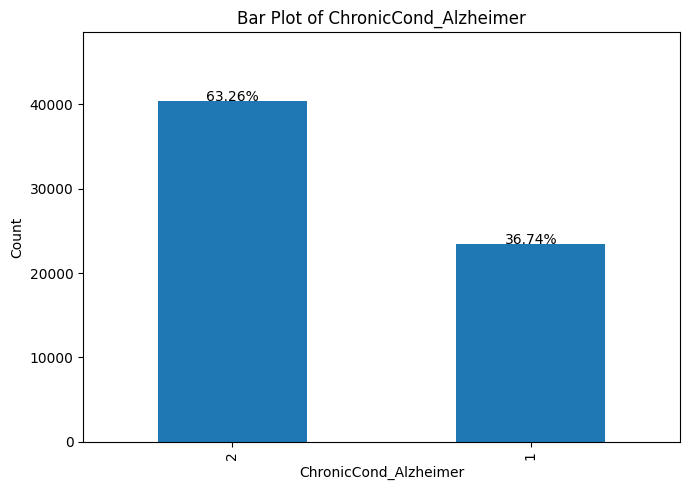

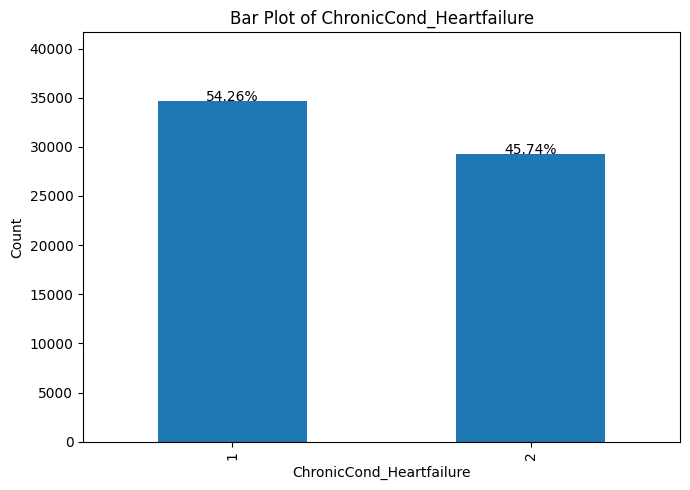

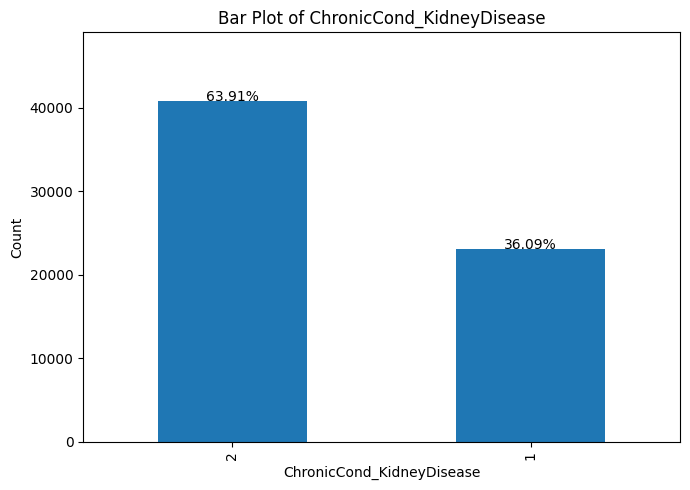

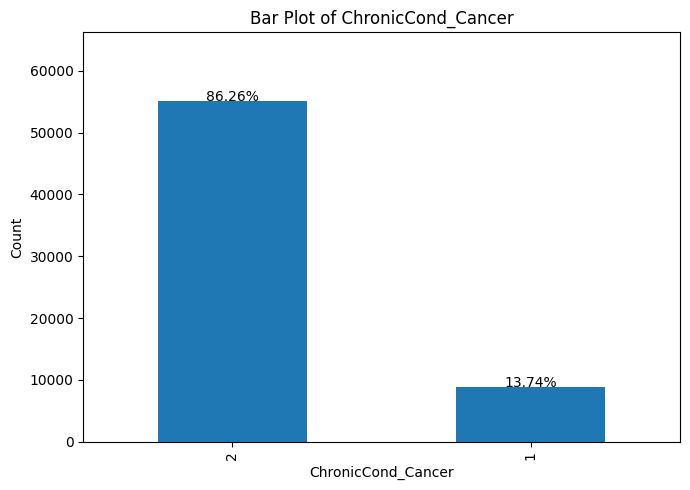

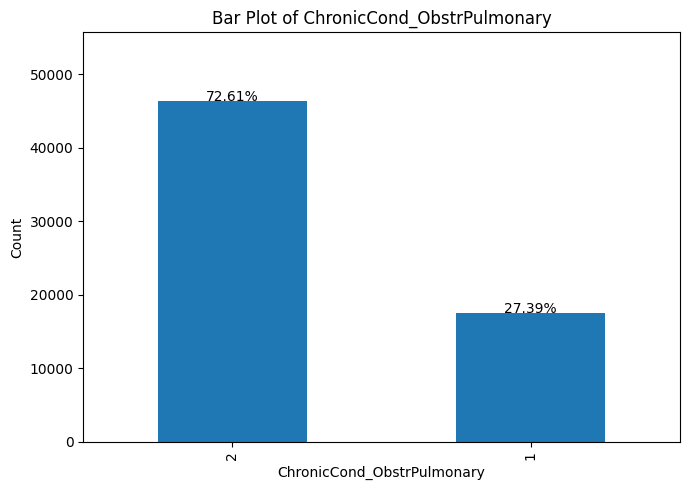

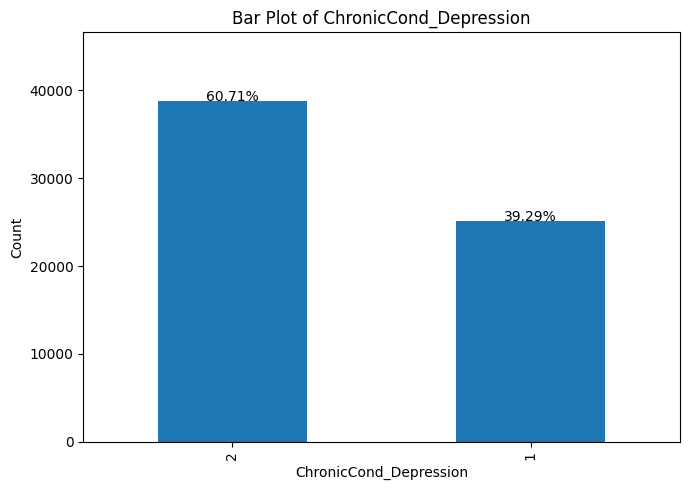

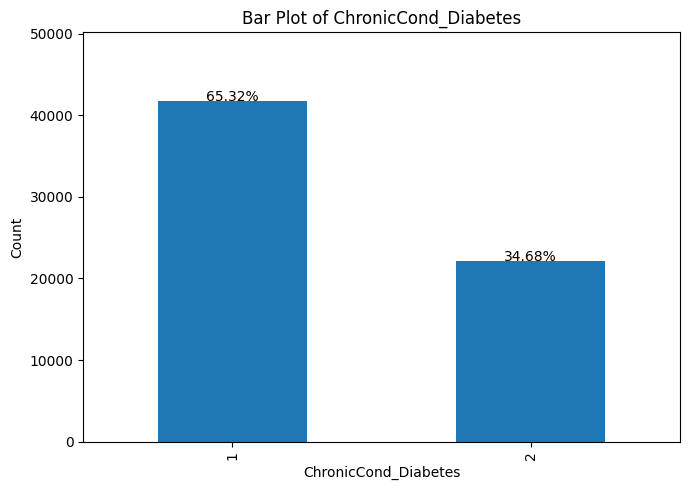

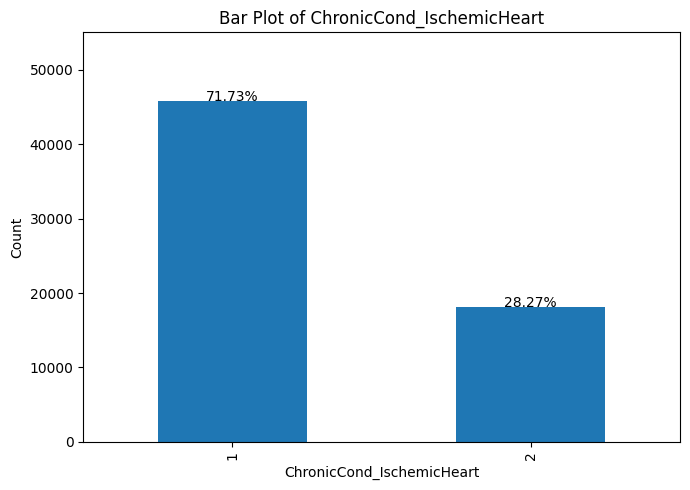

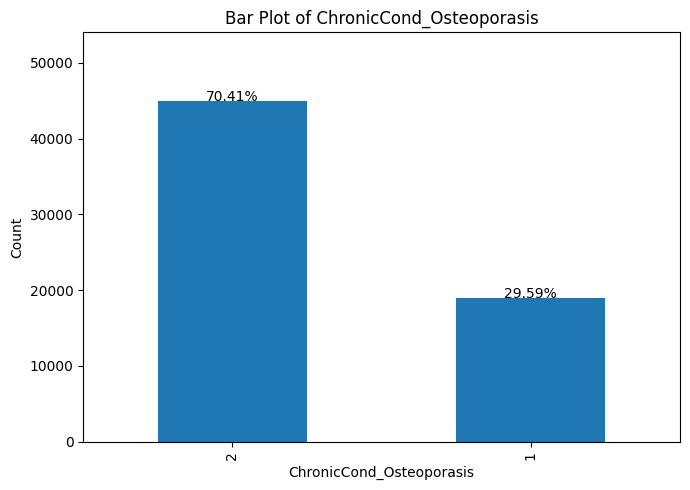

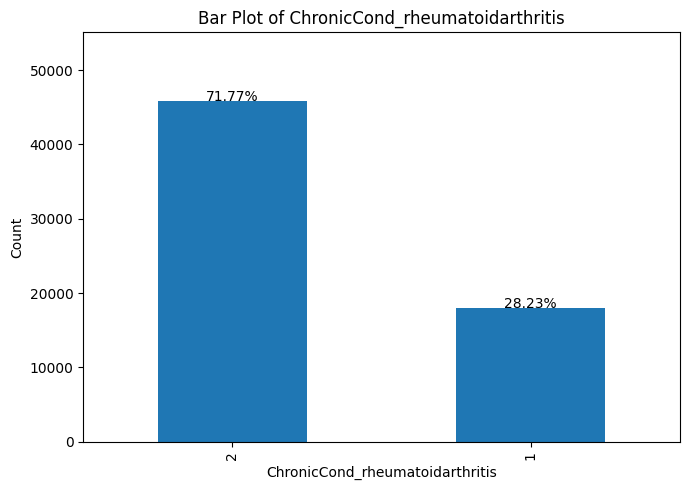

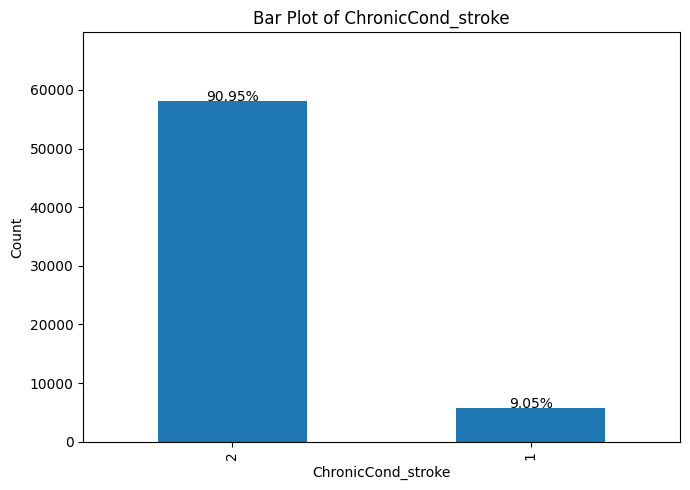

In [19]:
columns_to_plot = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']
plot_bar(df, columns_to_plot)

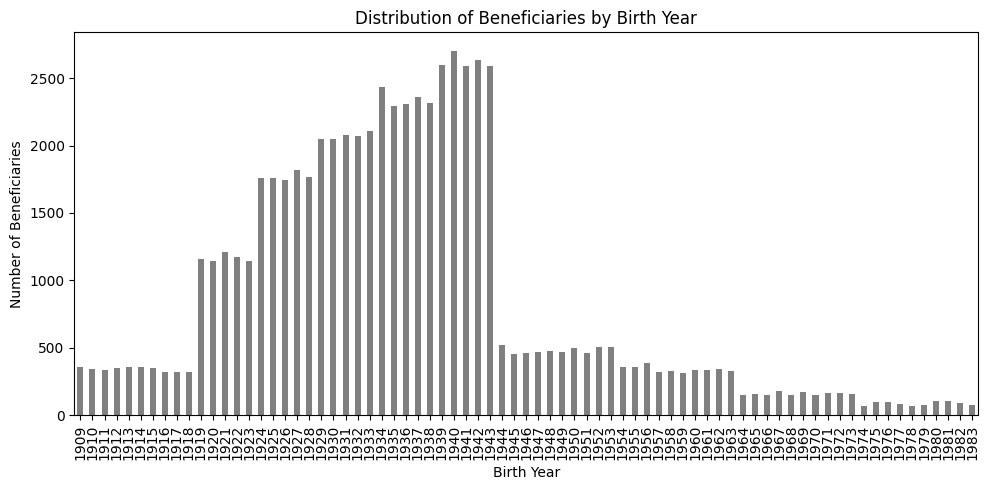

In [22]:
df['BirthYear'] = df['DOB'].dt.year
year_counts = df['BirthYear'].value_counts().sort_index()

plt.figure(figsize=(10, 5)) 
year_counts.plot(kind='bar', color='grey')
plt.title('Distribution of Beneficiaries by Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Number of Beneficiaries')
plt.tight_layout()
plt.show()

In [23]:
part_a = df['NoOfMonths_PartACov'].value_counts().reset_index().sort_values(
    by='NoOfMonths_PartACov', ascending=False
    ).rename(columns={'NoOfMonths_PartACov': 'NOM_part_A'})
part_a

,NOM_part_A,count
0,12,63489
3,11,15
9,10,4
5,9,7
4,8,12
7,7,6
2,6,15
8,5,6
6,4,6
10,3,2


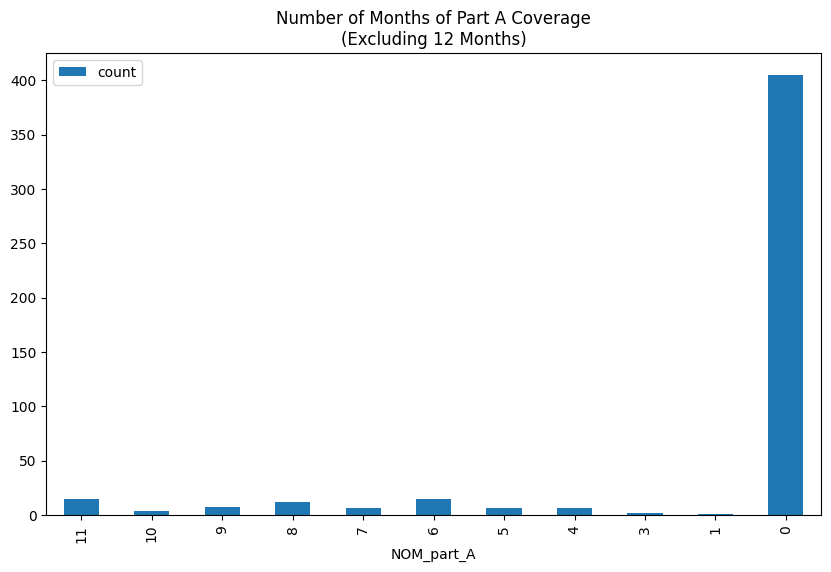

In [25]:
# Plot the number of months of Part A coverage excluding the 12 months
part_a.tail(11).plot(kind='bar', x='NOM_part_A', y='count', figsize=(10, 6))
plt.title('Number of Months of Part A Coverage\n(Excluding 12 Months)')
plt.show()

I removed from this plot the most common answer here (12 months) so I can see the rest of the answers split.
- The most common answer was 12 months with 63489 participants.
- Month 2 is not appeared in this dataset for this column.
  

In [26]:
part_b = df['NoOfMonths_PartBCov'].value_counts().reset_index().sort_values(
    by='NoOfMonths_PartBCov', ascending=False
    ).rename(columns={'NoOfMonths_PartBCov': 'NOM_part_B'})
part_b

,NOM_part_B,count
0,12,63360
3,11,62
4,10,51
5,9,40
6,8,24
7,7,21
2,6,104
8,5,19
11,4,9
9,3,11


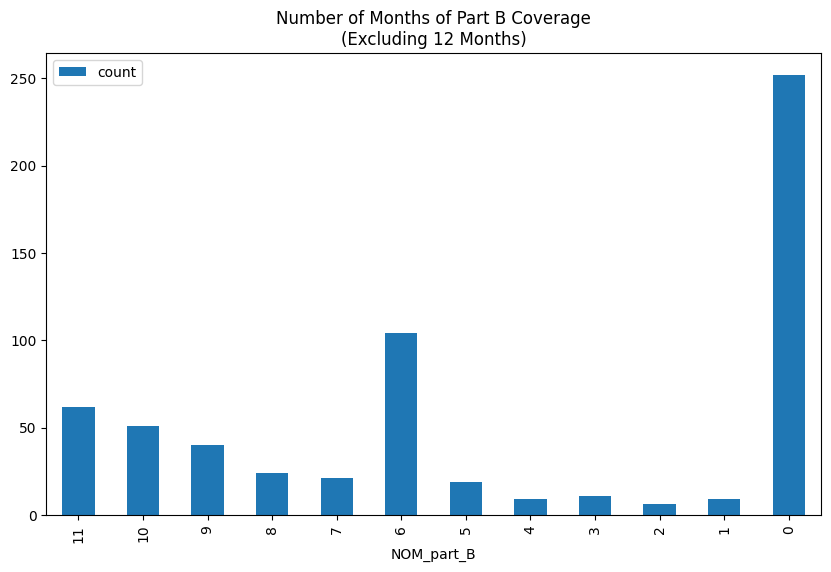

In [27]:
# Plot the number of months of Part B coverage excluding the 12 months
part_b.tail(12).plot(kind='bar', x='NOM_part_B', y='count', figsize=(10, 6),)
# fig.annotate(f'{str(round((height*100)/train_bene_df.shape[0],2))+"%"}', (x + width/2, y + height*1.02), ha='center', fontsize=13.5, rotation=0)
plt.title('Number of Months of Part B Coverage\n(Excluding 12 Months)')
plt.show()

I removed the most common answer here (12 months) so i can see the rest of the answers split.
- the most common answer was 12 months with 63,360 participants.

In [28]:
df['DOB'].min() , df['DOB'].max()

(Timestamp('1909-01-01 00:00:00'), Timestamp('1983-12-01 00:00:00'))

In [29]:
money = df[['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']]
money.describe()

,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,63968.000000,63968.000000,63968.000000,63968.000000
mean,4557.559561,497.287769,1664.710324,478.964154
std,10741.954472,1095.432994,3010.045357,768.234011
min,-1000.000000,0.000000,-60.000000,0.000000
25%,0.000000,0.000000,290.000000,70.000000
50%,0.000000,0.000000,800.000000,230.000000
75%,5000.000000,1068.000000,1960.000000,590.000000
max,155600.000000,38272.000000,97510.000000,13840.000000


In [30]:
df.loc[df['IPAnnualReimbursementAmt'] < 0]

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,BirthYear
3752,BENE19571,1938-07-01,NaT,2,1,0,32,230,12,12,1,1,2,2,1,1,1,1,2,2,2,-300,1068,4720,770,1938
7051,BENE27231,1935-02-01,NaT,1,1,0,42,250,12,12,1,1,2,2,1,1,1,1,1,2,2,-100,1068,1220,770,1935
14343,BENE44298,1929-02-01,NaT,2,2,0,1,510,12,12,2,1,2,2,2,2,2,1,2,2,2,-300,1068,2430,200,1929
18972,BENE54894,1926-04-01,NaT,2,1,0,14,141,12,12,2,1,2,2,2,1,1,2,2,2,2,-1000,1068,100,10,1926
32276,BENE85807,1972-12-01,NaT,1,1,0,44,60,12,12,2,2,2,2,2,1,2,1,2,2,2,-40,1068,170,110,1972
39800,BENE103244,1925-10-01,NaT,2,1,0,5,370,12,12,1,2,2,2,2,1,1,2,1,2,2,-800,1068,90,0,1925
39941,BENE103563,1934-07-01,NaT,1,1,0,45,810,12,12,1,2,1,2,2,1,1,1,1,2,2,-10,1068,480,200,1934
40656,BENE105279,1931-11-01,NaT,2,1,0,34,800,12,12,1,1,2,2,2,2,1,2,2,2,2,-200,1068,1420,840,1931
43065,BENE110853,1913-06-01,NaT,2,3,0,5,650,12,12,1,1,2,2,1,1,1,1,2,2,2,-200,1068,420,100,1913


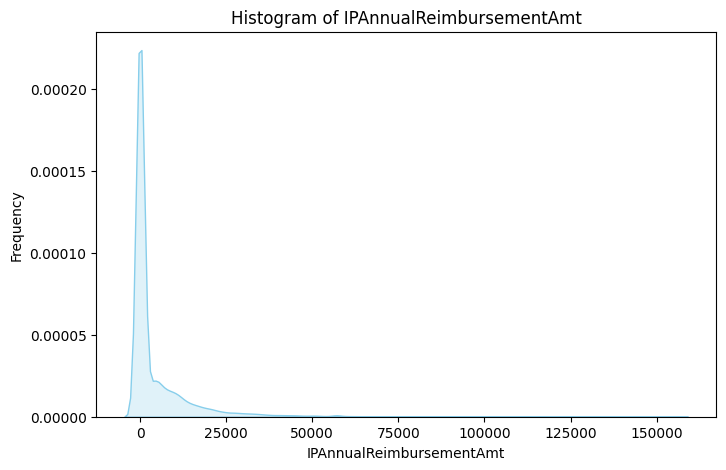

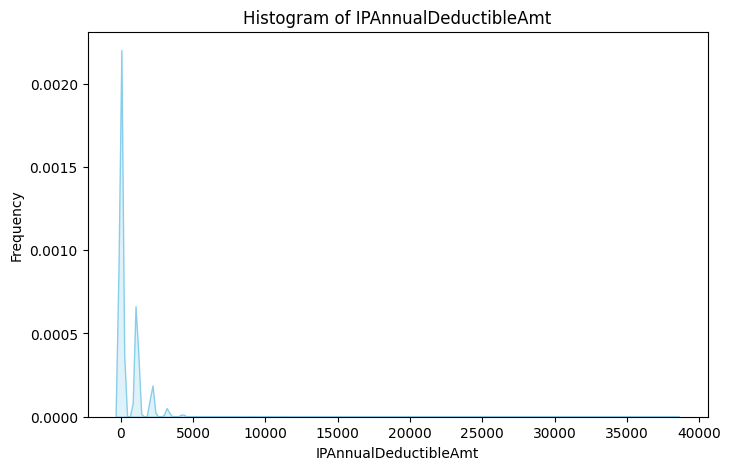

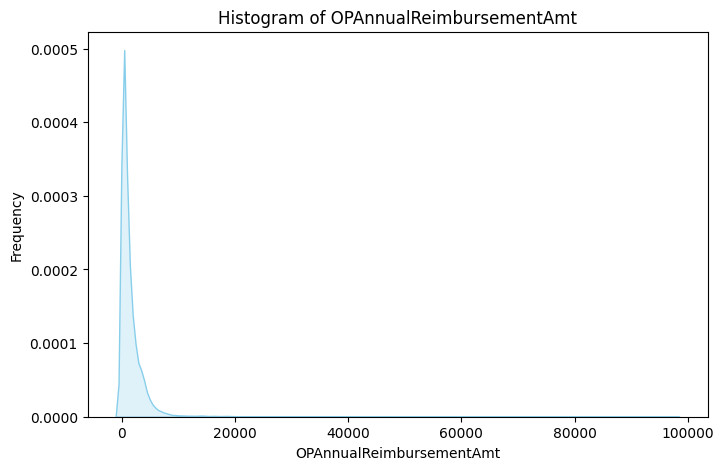

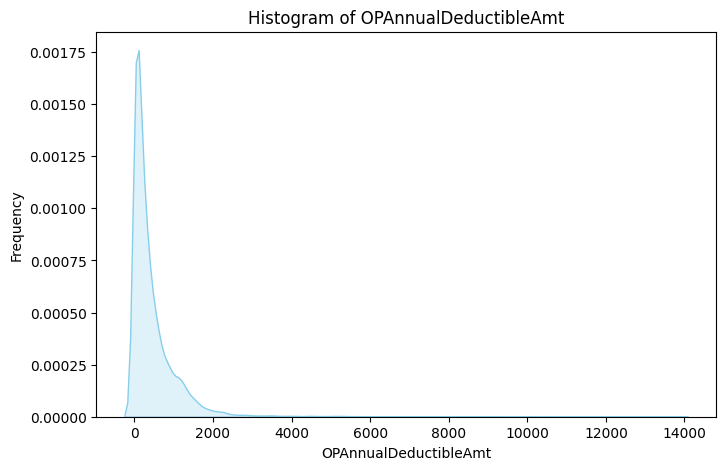

In [31]:
def plot_hist(cols):
    """
    Plots histograms for the specified columns in the dataframe.

    Parameters:
        cols (list): List of column names to plot.
    """
    for col in cols:
        if col in df.columns:
            plt.figure(figsize=(8, 5))
            sns.kdeplot(df[col], color='skyblue', fill=True)
            # df[col].plot(kind='hist', bins=30, color='skyblue')
            plt.title(f'Histogram of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()


plot_hist(['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt'])

In [32]:
df.groupby('BeneID')['IPAnnualReimbursementAmt'].sum().nlargest(10)

BeneID
BENE112649    155600
BENE158540    155270
BENE112394    147000
BENE83465     144240
BENE111157    144000
BENE25833     138600
BENE21360     136100
BENE32369     136000
BENE117983    133090
BENE48043     132400
Name: IPAnnualReimbursementAmt, dtype: int64

In [33]:
df.loc[df['BeneID'] == 'BENE111157']

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,BirthYear
43201,BENE111157,1948-07-01,NaT,2,2,0,1,360,12,12,2,1,2,2,1,1,1,1,2,2,2,144000,2136,97510,1145,1948


In [34]:
states = df['State'].value_counts().reset_index().sort_values(by='count', ascending=False)
states.head(10)

,State,count
0,45,5283
1,10,5084
2,33,3903
3,5,3812
4,14,2770
5,36,2711
6,39,2604
7,31,2507
8,23,2393
9,34,2179


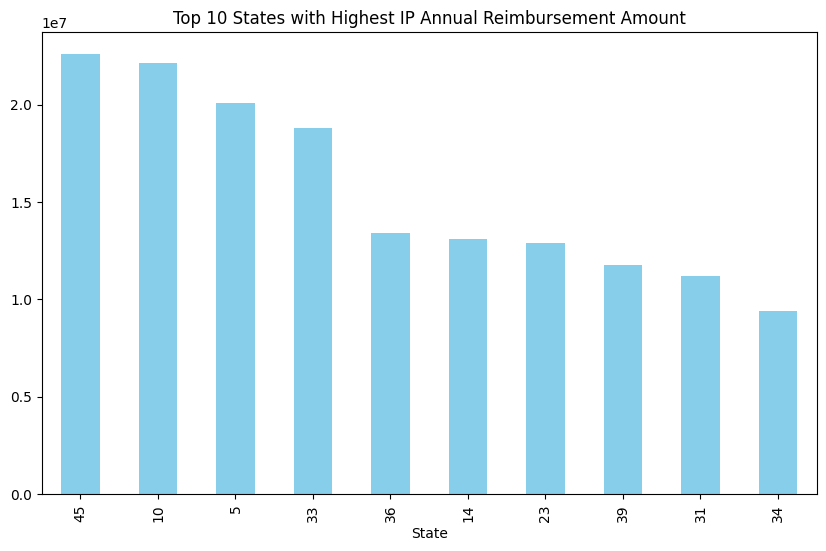

In [35]:
df.groupby('State')['IPAnnualReimbursementAmt'].sum().nlargest(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 States with Highest IP Annual Reimbursement Amount')
plt.show()

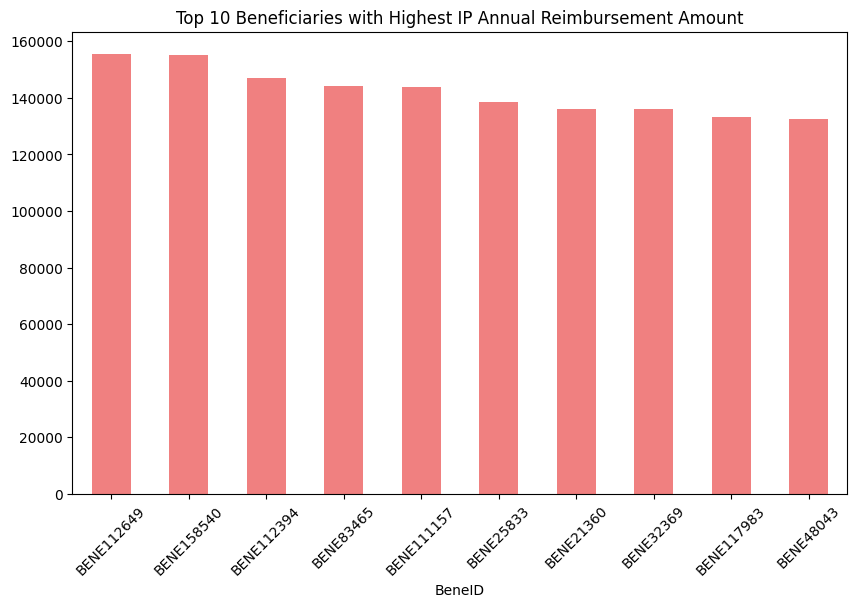

In [36]:
df.groupby('BeneID')['IPAnnualReimbursementAmt'].sum().nlargest(10).plot(kind='bar', figsize=(10, 6), color='lightcoral', )
plt.xticks(rotation=45)
plt.title('Top 10 Beneficiaries with Highest IP Annual Reimbursement Amount')
plt.show()

In [37]:
def val_count(data, col):
    """
    To get the value counts of a column.
    data: data frame name
    col: column to get value counts
    """
    for i in col:
        print(f"Value counts for: {data[i].value_counts()}:")
        print("***********************\n\n")


In [38]:
lst = ['Gender',
 'Race',
 'RenalDiseaseIndicator',
 'State',
 'County',
 'NoOfMonths_PartACov',
 'NoOfMonths_PartBCov',
 'ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'ChronicCond_stroke',
 'IPAnnualReimbursementAmt',
 'IPAnnualDeductibleAmt',
 'OPAnnualReimbursementAmt',
 'OPAnnualDeductibleAmt']
val_count(df,lst)

Value counts for: Gender
2    36721
1    27247
Name: count, dtype: int64:
***********************


Value counts for: Race
1    54105
2     6384
3     2147
5     1332
Name: count, dtype: int64:
***********************


Value counts for: RenalDiseaseIndicator
0    53408
Y    10560
Name: count, dtype: int64:
***********************


Value counts for: State
45    5283
10    5084
33    3903
5     3812
14    2770
36    2711
39    2604
31    2507
23    2393
34    2179
49    1612
22    1554
52    1545
1     1459
11    1428
26    1364
18    1302
15    1289
44    1259
24    1241
7     1219
37    1169
19    1141
42     976
3      951
17     925
50     772
29     771
25     749
38     713
6      649
54     647
21     622
16     549
4      529
51     527
30     434
41     406
20     399
8      364
35     314
27     302
32     301
12     258
13     240
9      171
46     110
2      107
53     106
28      95
43      87
47      66
Name: count, dtype: int64:
***********************


Value counts for

# Second part of notebook

In [39]:
# Replace 'Y' with 1
df_renal = df.copy()
df_renal['RenalDiseaseIndicator'] = df_renal['RenalDiseaseIndicator'].replace('Y', 1)

In [40]:
df_renal['RenalDiseaseIndicator'].value_counts()

RenalDiseaseIndicator
0    53408
1    10560
Name: count, dtype: int64

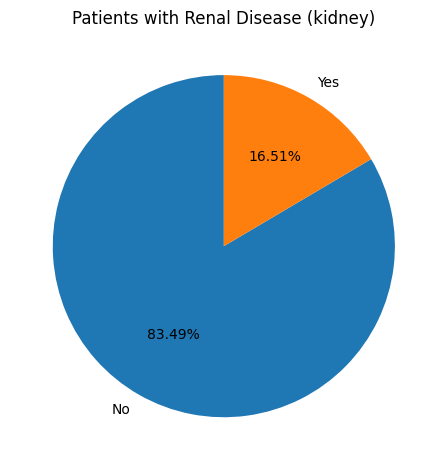

In [42]:
df_renal['RenalDiseaseIndicator'].value_counts().plot(kind='pie',autopct='%1.2f%%',startangle=90, labels=['No','Yes'])
plt.title('Patients with Renal Disease (kidney)')
plt.ylabel('')
plt.xlabel('')
plt.Figure(figsize=(8,5))
plt.tight_layout()
plt.show()

In [43]:
df['DOD'].value_counts()

DOD
2009-12-01    92
2009-08-01    74
2009-09-01    73
2009-10-01    63
2009-11-01    59
2009-07-01    49
2009-06-01    47
2009-05-01    41
2009-04-01    33
2009-03-01    23
2009-02-01    19
2009-01-01     1
Name: count, dtype: int64

In [44]:
df_dead = df.copy()
df_dead['whether_dead'] = df_dead['DOD'].apply(lambda val: 0 if val != val else 1)
df_dead['whether_dead'].value_counts().reset_index().rename(columns={'count': "total_counts"})


,whether_dead,total_counts
0,0,63394
1,1,574


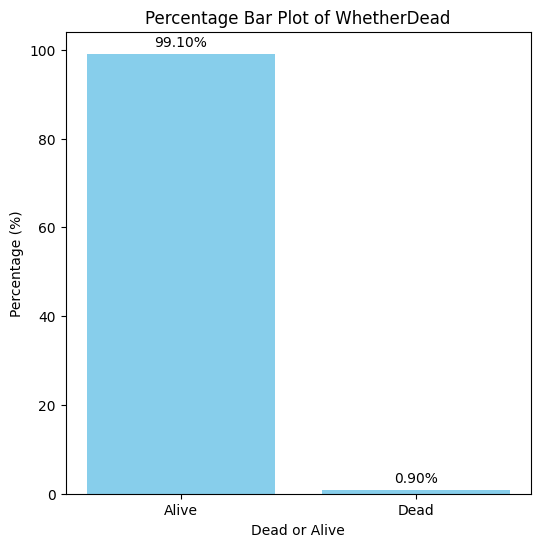

In [45]:
from matplotlib import ticker
# Calculate percentages
values_ = df_dead['whether_dead'].value_counts().reset_index()
values_.columns = ['whether_dead', 'total_counts']
values_['percentage'] = (values_['total_counts'] / values_['total_counts'].sum()) * 100
answer = ('Dead', 'Alive')
x = (1,0)
# Create the bar plot with percentages
fig, ax = plt.subplots(figsize=(6, 6))
bars = ax.bar(values_['whether_dead'], values_['percentage'], color='skyblue')

# Add percentage values on top of each bar
for bar, perc in zip(bars, values_['percentage']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Center of the bar
        bar.get_height() + 1,               # Slightly above the bar
        f'{perc:.2f}%',                     # Format percentage
        ha='center', va='bottom', fontsize=10
    )

# Add descriptive text
# my_text = r'$0\ means\ Alive,\ 1\ means\ Dead$'
# ax.text(0.5, 0.7, my_text, fontsize=10, transform=ax.transAxes)

# Set plot labels and title
ax.set_title('Percentage Bar Plot of WhetherDead')
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Dead or Alive')
ax.set_xticks(x ,answer)
plt.show()

Here I have about 99% of patiant alive and less than 1% of dead in this data.

In [46]:
# replacing the number 2's to 0, this value means "No", while value 1 means "Yes"
bene_df = df.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                        'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                        'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                        'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)
bene_df['RenalDiseaseIndicator'] = bene_df['RenalDiseaseIndicator'].apply(lambda x: 1 if x == 'Y' else 0)
bene_df.sample(5)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,BirthYear
55570,BENE139734,1940-03-01,NaT,1,1,0,36,510,12,12,0,0,1,0,0,0,1,0,1,0,1,0,0,730,230,1940
63900,BENE159039,1942-02-01,NaT,1,1,0,18,500,12,12,0,1,1,0,0,1,1,1,1,1,0,0,0,3500,250,1942
1245,BENE13810,1938-03-01,NaT,1,2,1,4,130,12,12,1,1,0,0,1,0,1,1,1,1,1,0,0,4120,1460,1938
25125,BENE69180,1926-09-01,NaT,1,1,0,31,290,12,12,0,1,1,0,1,0,1,1,1,1,0,8000,1068,0,0,1926
40288,BENE104379,1949-06-01,NaT,1,1,0,45,530,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,420,600,1949


In [47]:
bene_df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,BirthYear
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,1943
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,1,1,0,0,0,0,1,0,1,1,0,0,0,1490,160,1940
2,BENE11010,1936-07-01,NaT,2,1,0,41,30,12,12,0,1,0,1,1,0,1,1,1,0,0,0,0,1170,660,1936
3,BENE11011,1914-03-01,NaT,2,2,0,1,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,1914
4,BENE11014,1938-04-01,NaT,2,1,1,45,780,12,12,0,1,1,0,1,1,0,1,0,0,0,21260,2136,120,100,1938


In [48]:
print(f"total outpatiants reimbursments: {df['OPAnnualDeductibleAmt'].sum():,}")
print(f"total outpatiants reimbursments: {df['OPAnnualReimbursementAmt'].sum():,}")
print(f"total inpatiants reimbursments: {df['IPAnnualDeductibleAmt'].sum():,}")
print(f"total inpatiants reimbursments: {df['IPAnnualReimbursementAmt'].sum():,}")

total outpatiants reimbursments: 30,638,379
total outpatiants reimbursments: 106,488,190
total inpatiants reimbursments: 31,810,504
total inpatiants reimbursments: 291,537,970
